In [ ]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# error import statsmodels.stats as sms
import time
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import scvelo as scv
import pegasus as pg
from matplotlib.pyplot import rc_context

In [ ]:
adata = sc.read('../adata_soloTE_protein_NOsoupx_after_regress_scrublet_annobasic_Aug11.h5ad')

In [ ]:
sc.pl.umap(adata, color=['anno'], groups = ['Endothelial-6','Endothelial-7','28','Microglia-7','Glutamatergic neuron-5'],frameon=False, save='ambiguous_assignments')

In [ ]:
adata = adata[~adata.obs['anno'].isin(['Endothelial-6','Endothelial-7','28','Microglia-7','Glutamatergic neuron-5'])] #unlcear cell assignments

In [ ]:
adata.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(
    adata, groupby="anno", method="wilcoxon", key_added="pg_bulk_label_sub_2")

sc.pl.rank_genes_groups_dotplot(
    adata, groupby="anno", standard_scale="var", n_genes=10, key="pg_bulk_label_sub_2"
)

In [379]:
adata.obs['anno'].value_counts()

anno
Endothelial               26756
Microglia                 24044
Endothelial-2             16616
Endothelial-3             13505
Oligodendrocyte           11116
Endothelial-4              8978
Endothelial-5              6009
Glutamatergic neuron       5848
Astrocyte                  5597
OPC                        3954
Mural                      2492
Glutamatergic neuron-2     1945
GABAergic neuron           1936
OPC-2                      1914
GABAergic neuron-2         1573
Mural-2                    1465
Microglia-2                1098
Glutamatergic neuron-3     1051
Mural-3                     916
Glutamatergic neuron-4      674
Microglia-3                 647
Microglia-4                 344
Microglia-5                 201
Glutamatergic neuron-5      162
Microglia-6                 146
Name: count, dtype: int64

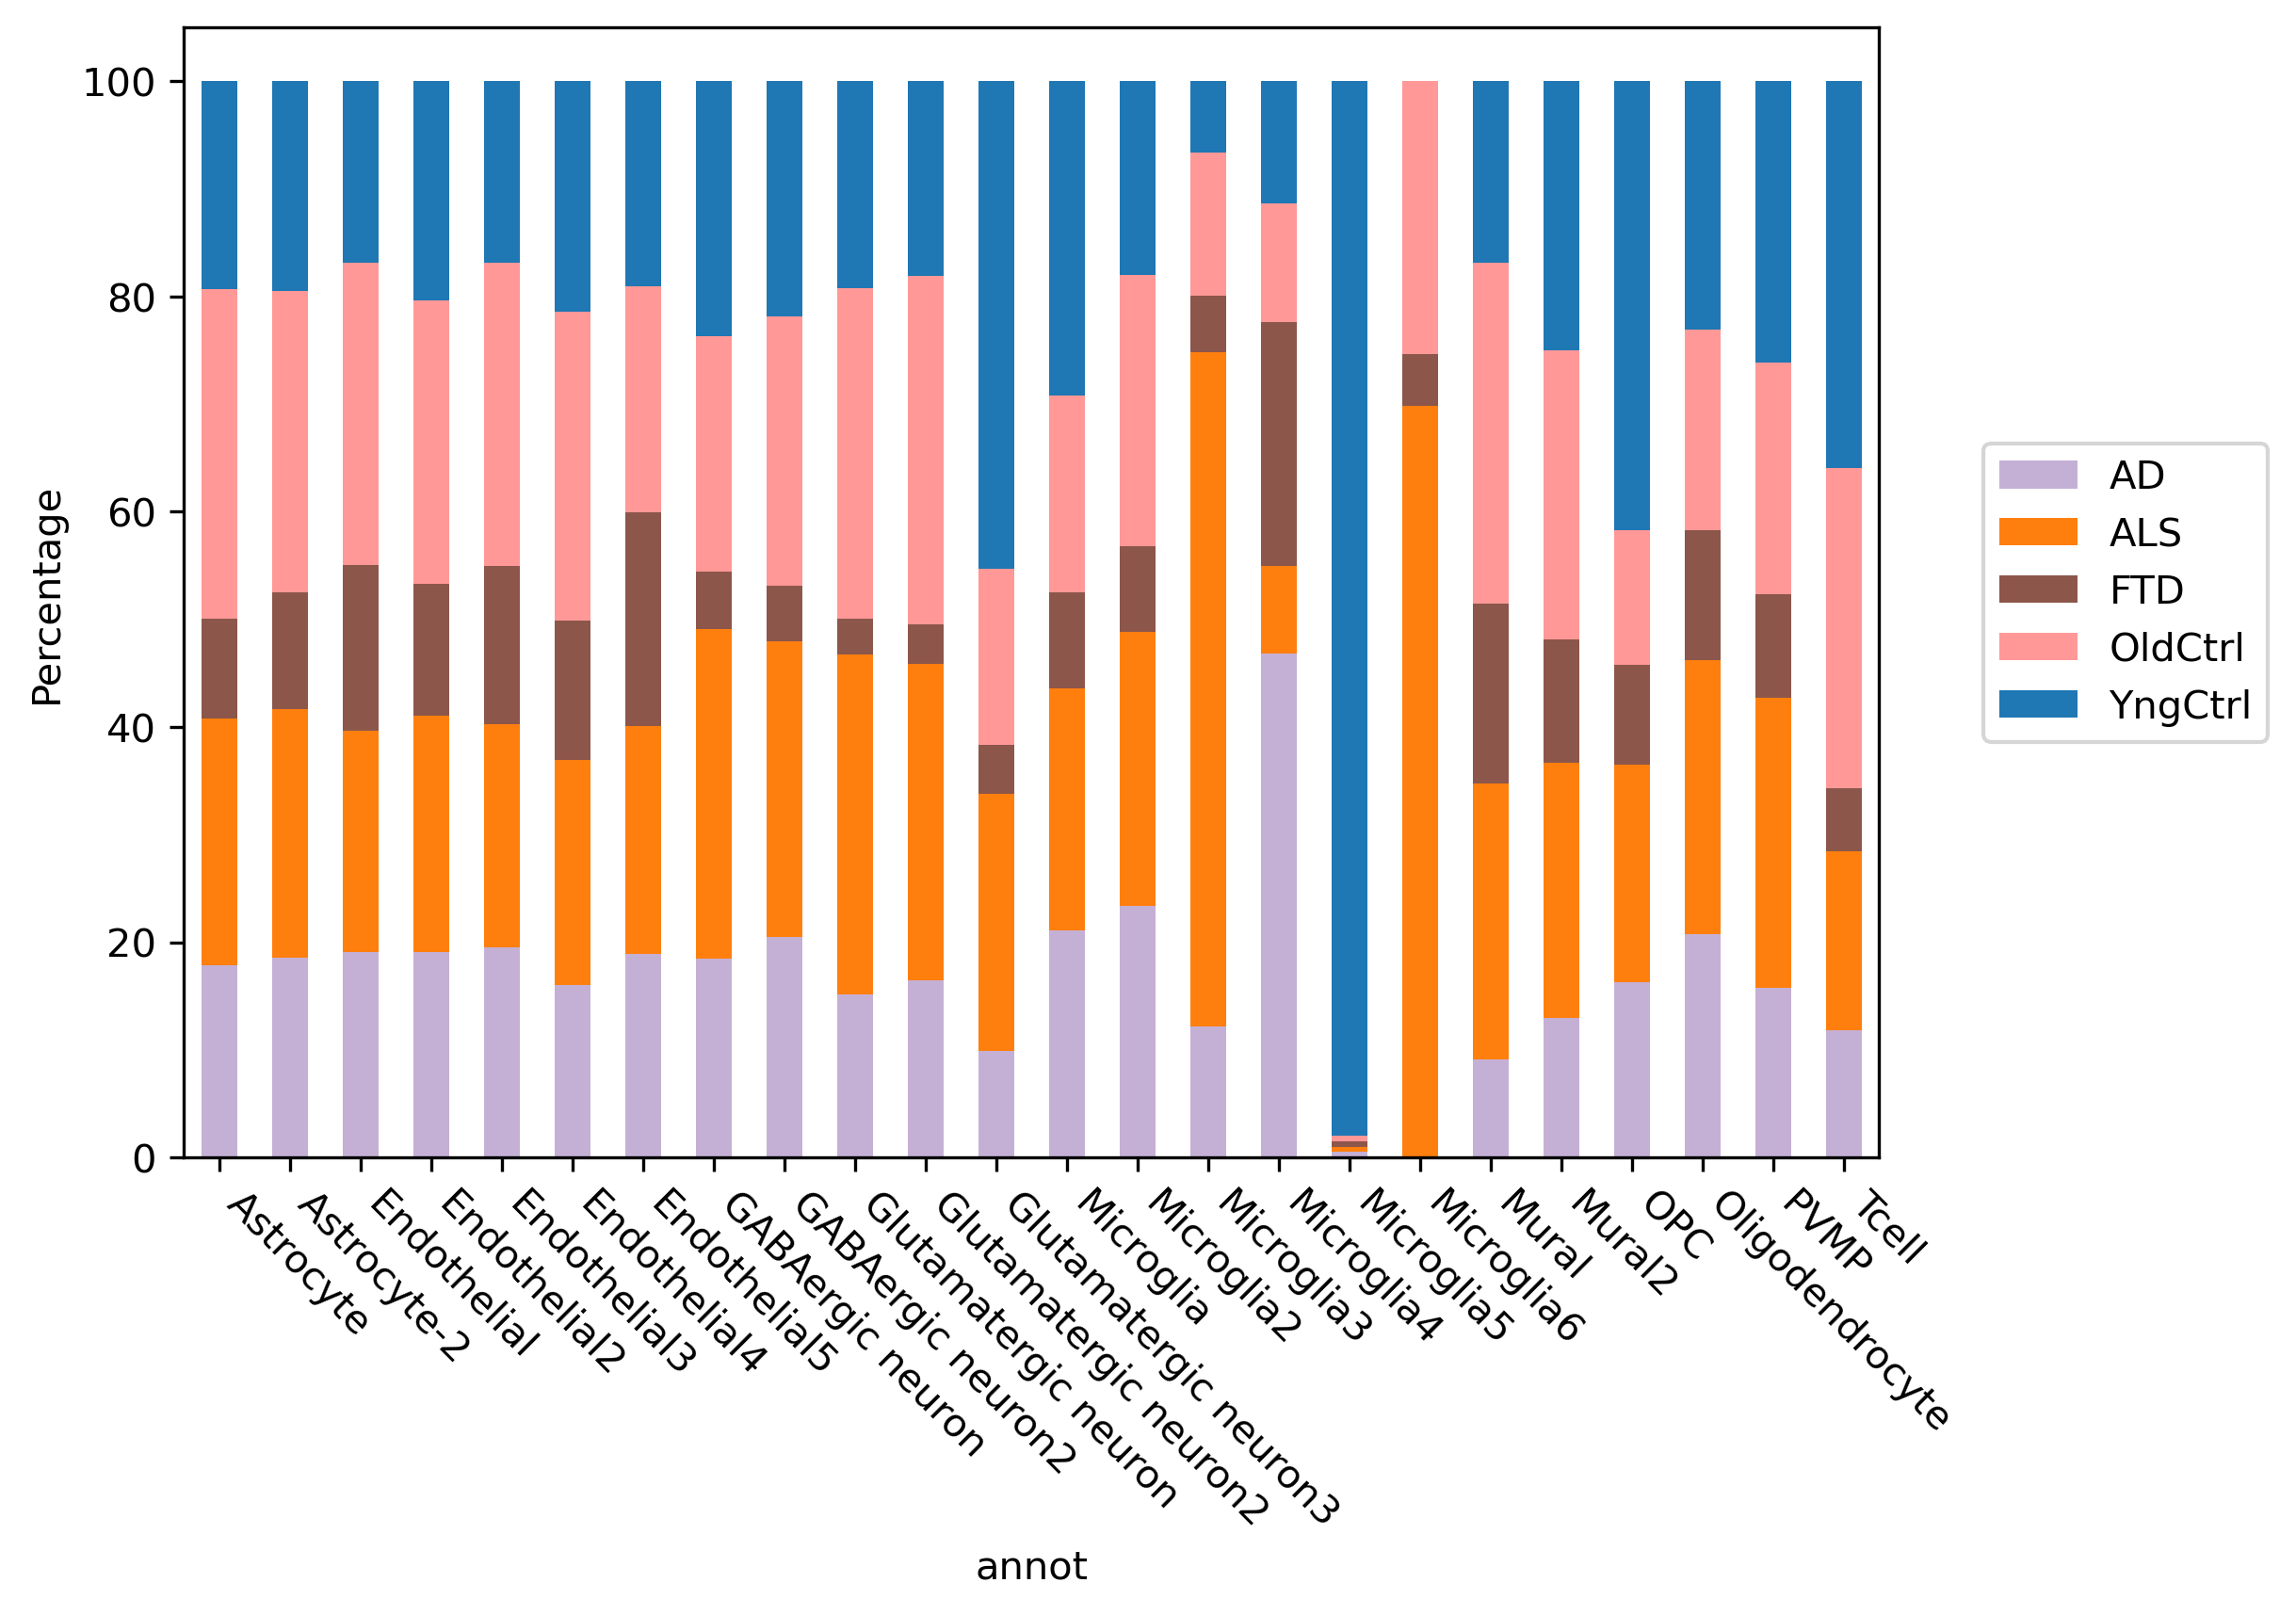

In [388]:
cell_dict = {
    'Endothelial': 'Endothelial',
    'Endothelial-2': 'Endothelial2',
    'Endothelial-3': 'Endothelial3',
    'Endothelial-4': 'Endothelial4',
    'Endothelial-5':'Endothelial5',
 
    'Oligodendrocyte': 'Oligodendrocyte',
    'Glutamatergic neuron': 'Glutamatergic neuron',
    'Glutamatergic neuron-2': 'Glutamatergic neuron2',
    'Glutamatergic neuron-3': 'Glutamatergic neuron3',
    'Glutamatergic neuron-4': 'Tcell',

    'GABAergic neuron': 'GABAergic neuron',
    'GABAergic neuron-2': 'GABAergic neuron2',
    'Microglia': 'Microglia',
    'Astrocyte': 'Astrocyte',
    'Mural': 'Mural',
    'Mural-2': 'Astrocyte-2',
    'Mural-3': 'Mural2',


    'OPC': 'PVMP',
    'OPC-2': 'OPC',
    'Microglia-2': 'Microglia2',
    'Microglia-3': 'Microglia3',
    'Microglia-4': 'Microglia4',
    'Microglia-5': 'Microglia5',
    'Microglia-6': 'Microglia6',    
}

adata.obs['annot'] = adata.obs['anno'].map(cell_dict).astype('category')
adata.obs['annot'].cat.categories



fig = pg.compo_plot(adata, 'annot', 'DiseaseState', style = 'frequency')


In [389]:
cell_dict = {
    'Endothelial': 'Endothelial',
    'Endothelial-2': 'Endothelial',
    'Endothelial-3': 'Endothelial',
    'Endothelial-4': 'Endothelial',
    'Endothelial-5':'Endothelial',
 
    'Oligodendrocyte': 'Oligodendrocyte',
    'Glutamatergic neuron': 'Glutamatergic neuron',
    'Glutamatergic neuron-2': 'Glutamatergic neuron',
    'Glutamatergic neuron-3': 'Glutamatergic neuron',
    'Glutamatergic neuron-4': 'Tcell',

    'GABAergic neuron': 'GABAergic neuron',
    'GABAergic neuron-2': 'GABAergic neuron',
    'Microglia': 'Microglia',
    'Astrocyte': 'Astrocyte',
    'Mural': 'Mural',
    'Mural-2': 'Astrocyte',
    'Mural-3': 'Mural',


    'OPC': 'PVMP',
    'OPC-2': 'OPC',
    'Microglia-2': 'Microglia',
    'Microglia-3': 'Microglia',
    'Microglia-4': 'Microglia',
    'Microglia-5': 'Microglia',
    'Microglia-6': 'Microglia',    
}


adata.obs['bulk_label'] = adata.obs['anno'].map(cell_dict).astype('category')
adata.obs['bulk_label'].cat.categories



Index(['Astrocyte', 'Endothelial', 'GABAergic neuron', 'Glutamatergic neuron',
       'Microglia', 'Mural', 'OPC', 'Oligodendrocyte', 'PVMP', 'Tcell'],
      dtype='object')

In [390]:
adata.obs['Disease']=adata.obs['DiseaseState']

In [389]:
cell_dict = {
    'Endothelial': 'Endothelial',
    'Endothelial-2': 'Endothelial',
    'Endothelial-3': 'Endothelial',
    'Endothelial-4': 'Endothelial',
    'Endothelial-5':'Endothelial',
 
    'Oligodendrocyte': 'Oligodendrocyte',
    'Glutamatergic neuron': 'Glutamatergic neuron',
    'Glutamatergic neuron-2': 'Glutamatergic neuron',
    'Glutamatergic neuron-3': 'Glutamatergic neuron',
    'Glutamatergic neuron-4': 'Tcell',

    'GABAergic neuron': 'GABAergic neuron',
    'GABAergic neuron-2': 'GABAergic neuron',
    'Microglia': 'Microglia',
    'Astrocyte': 'Astrocyte',
    'Mural': 'Mural',
    'Mural-2': 'Astrocyte',
    'Mural-3': 'Mural',


    'OPC': 'PVMP',
    'OPC-2': 'OPC',
    'Microglia-2': 'Microglia',
    'Microglia-3': 'Microglia',
    'Microglia-4': 'Microglia',
    'Microglia-5': 'Microglia',
    'Microglia-6': 'Microglia',    
}


adata.obs['bulk_label'] = adata.obs['anno'].map(cell_dict).astype('category')
adata.obs['bulk_label'].cat.categories



Index(['Astrocyte', 'Endothelial', 'GABAergic neuron', 'Glutamatergic neuron',
       'Microglia', 'Mural', 'OPC', 'Oligodendrocyte', 'PVMP', 'Tcell'],
      dtype='object')

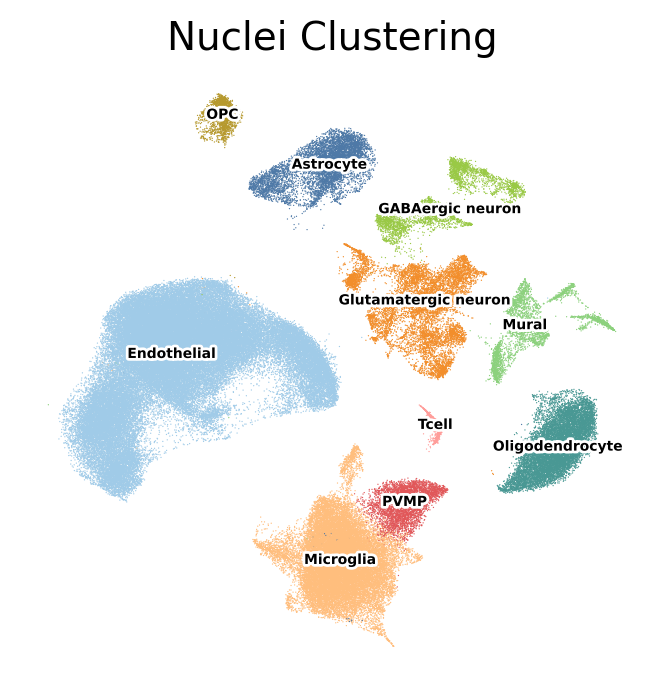

In [443]:
sc.settings.set_figure_params(dpi=100)

with rc_context({'figure.figsize': (4, 4)}):
    plt.rcParams['axes.facecolor'] = 'white'
    sc.pl.umap(adata, color='bulk_label', add_outline=False, legend_loc='on data',
               legend_fontsize=5, legend_fontoutline=2,frameon=False,
               title='Nuclei Clustering', palette=colorrs
               )

# heat map of cell markers (simple)

In [421]:
adata.uns['log1p']["base"] = None

In [422]:
sc.tl.rank_genes_groups(
    adata, groupby="bulk_label", method="wilcoxon", key_added="bulk_label")

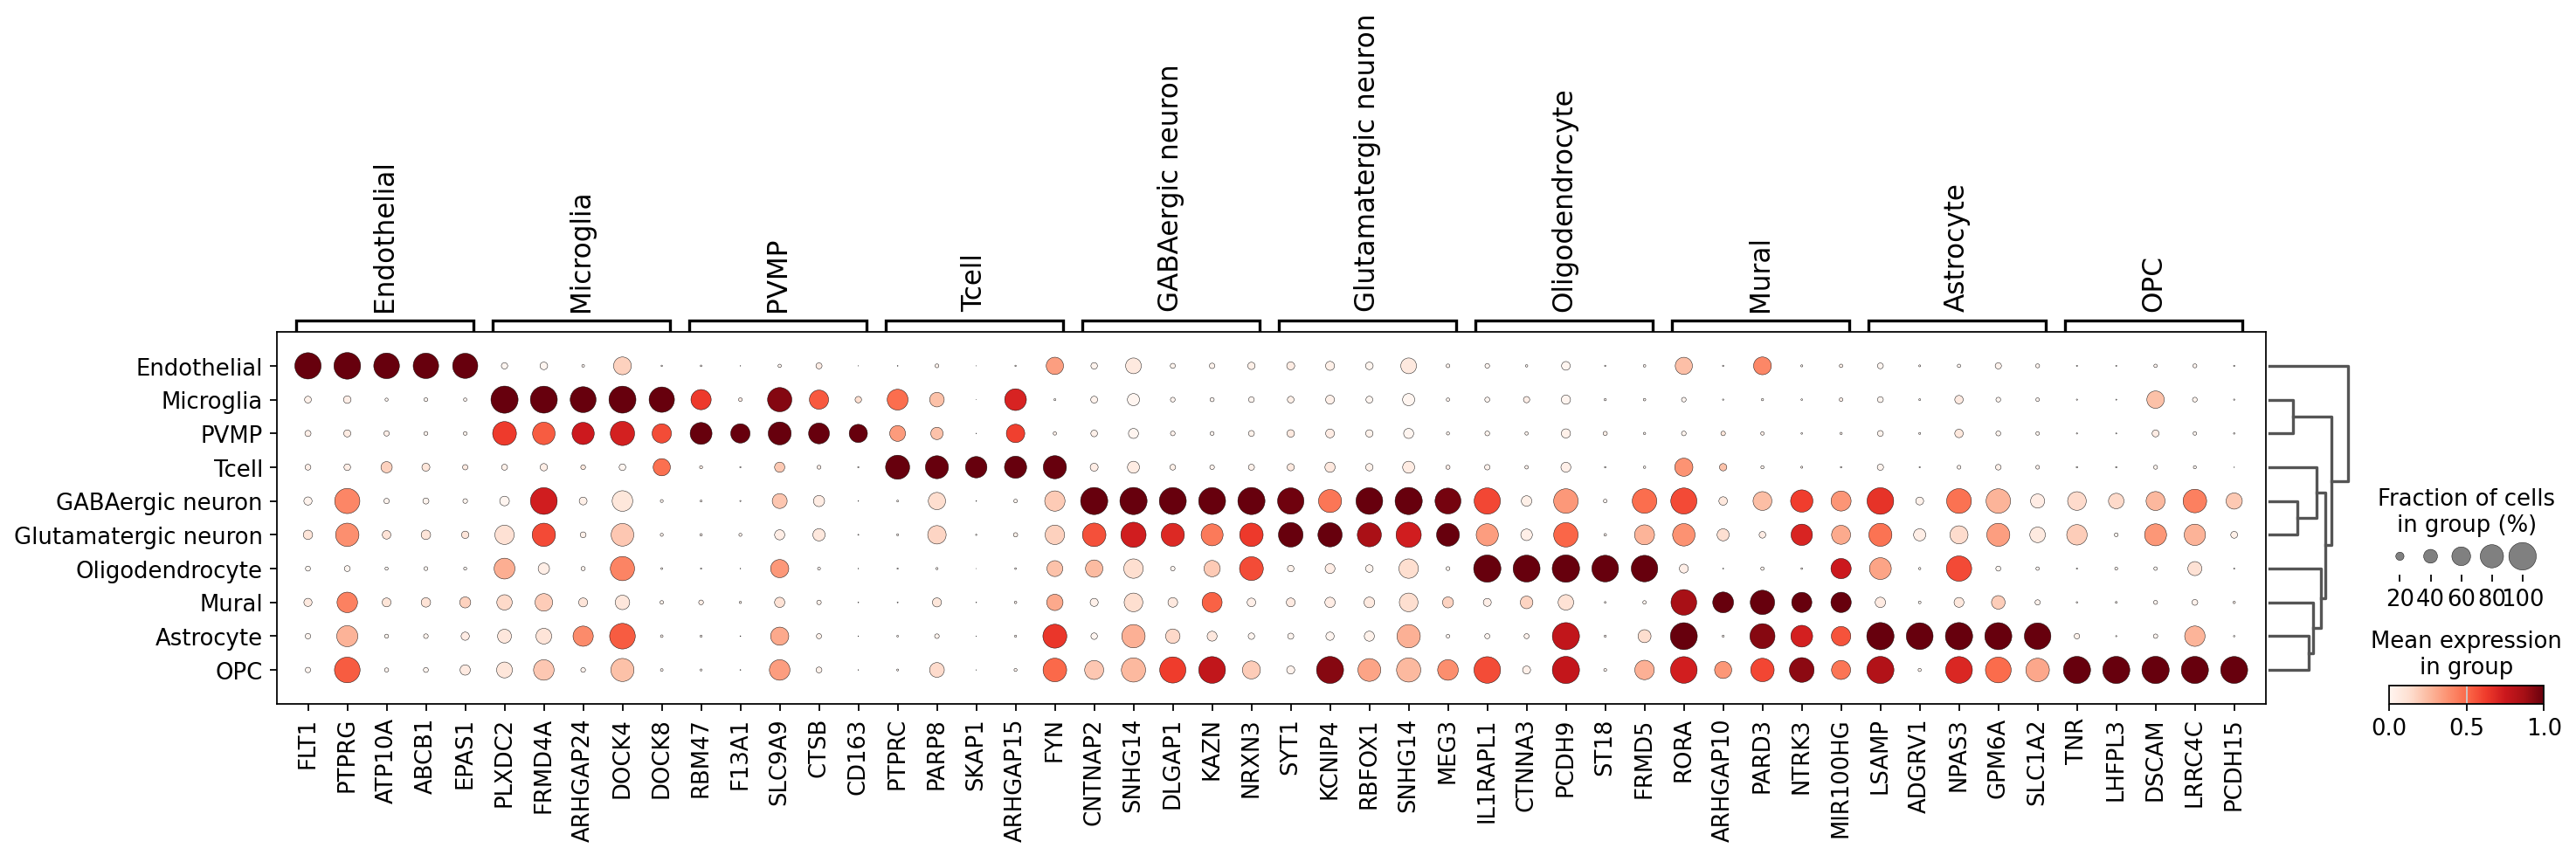

In [423]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="bulk_label", standard_scale="var", n_genes=5, key="bulk_label"
)

In [424]:
sc.tl.filter_rank_genes_groups(
    adata,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
    key="bulk_label",
    key_added="bulk_label_filtered",
)

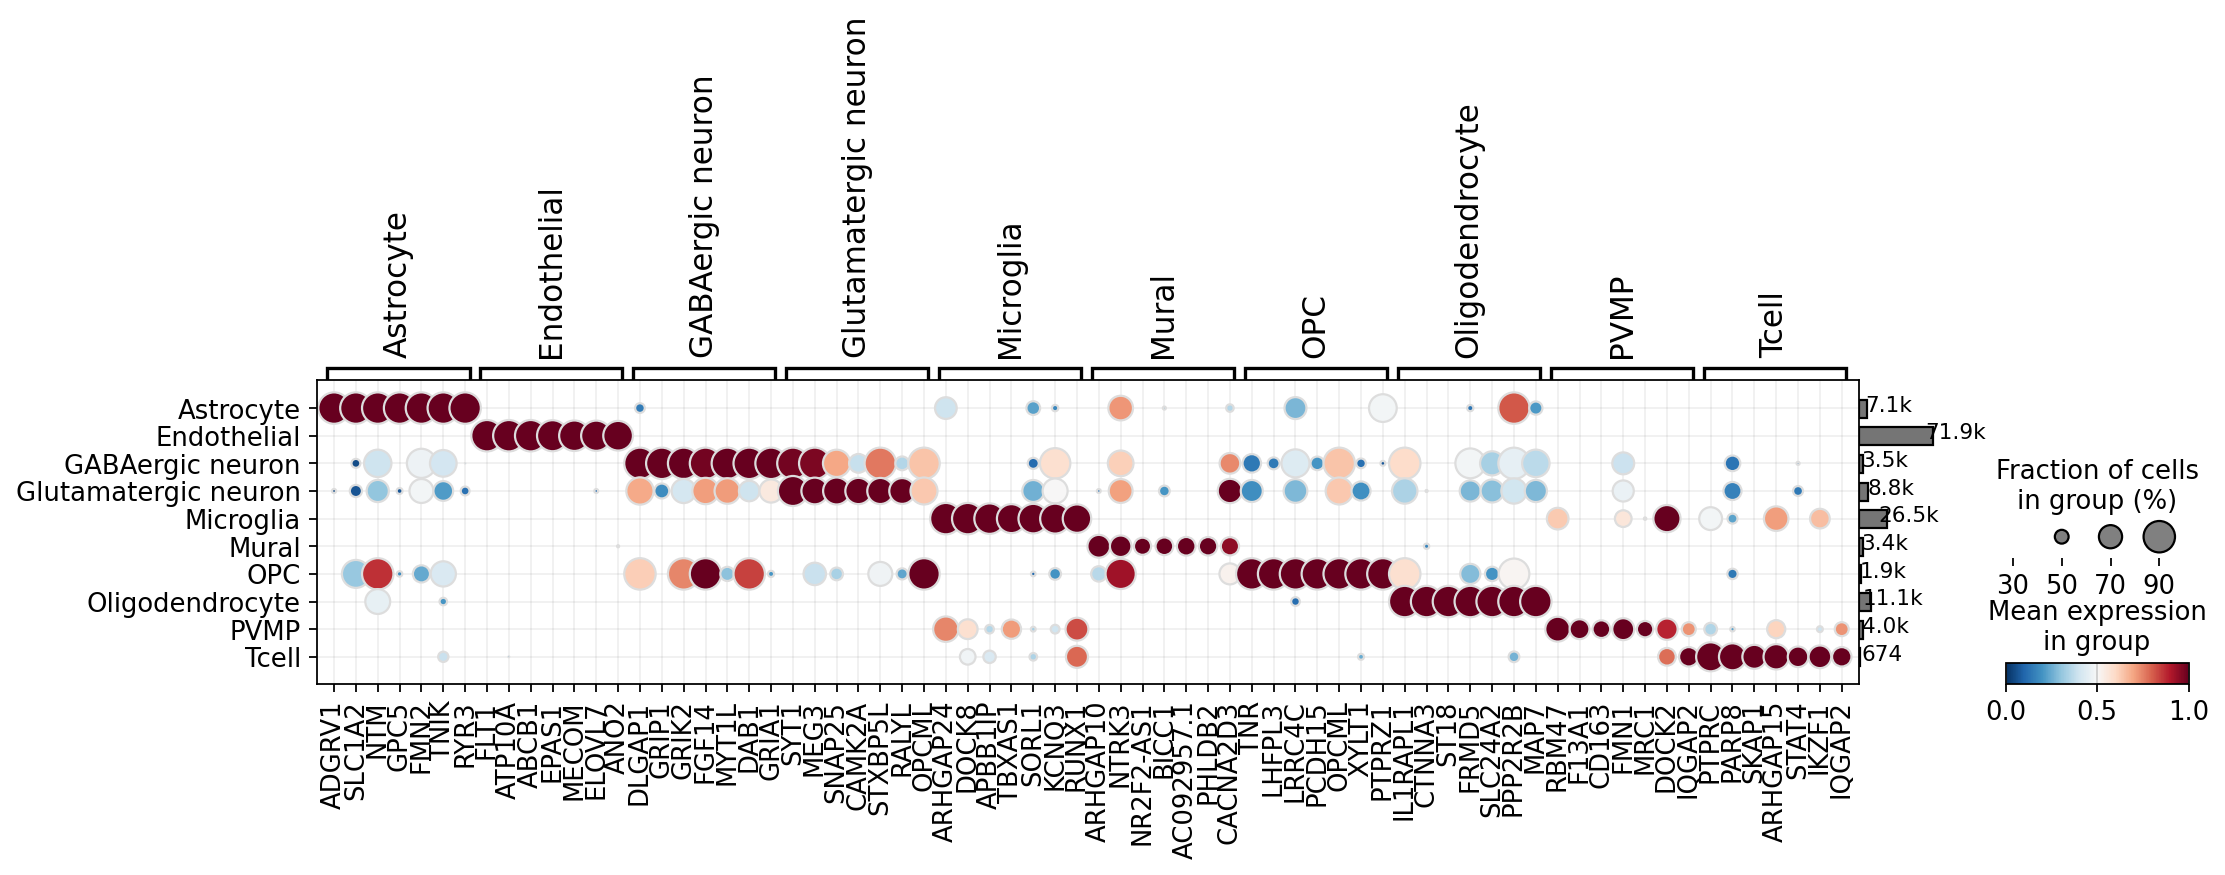

In [425]:
g = sc.pl.rank_genes_groups_dotplot(adata,
    groupby="bulk_label",
    standard_scale="var",
    n_genes=7,
    key="bulk_label_filtered", cmap='RdBu_r', return_fig=True, dendrogram=False, figsize=(15,2.5), show=False);
g.add_totals(color='#757575',)
g.style(cmap='RdBu_r', dot_edge_color='#DDDDDD', dot_edge_lw=1, dot_min=0.3, dot_max=.9, grid=True)
#g.savefig('./figures/figure1-prettydotplot.pdf');
g.show()

In [ ]:
adata = adata[~adata.obs["bulk_label"].isin(['Tcell'])] #low cell numbers

In [1]:
#check known markers from literature
markers = {'Astrocyte': ['GFAP','ALDH1L1','AQP4','GJA1','FGFR3'],
           'Endothelial': ['FLT1','ERG','VWF'], 
           'Neuron':['RBFOX3', 'GAD1', 'SLC17A7', 'SYP', 'CAMK2A'],
           'Microglia': ['AIF1','TMEM119','CX3CR1','ITGAM','P2RY12','SALL1'],
           'Mural':['NOTCH3', 'RGS5', 'PDGFRB','COL1A1','COL11A1'],
           'OPC':['PDGFRA','CSPG4','CSPG4','GPR17'],
           'Oligodendrocyte':['MBP', 'MOG', 'MAG', 'PLP1', 'CNP', 'SOX10', 'CLDN11'],
           'PVMP':['CD163', 'MRC1', 'LYVE1', 'MRC1'],
          
}

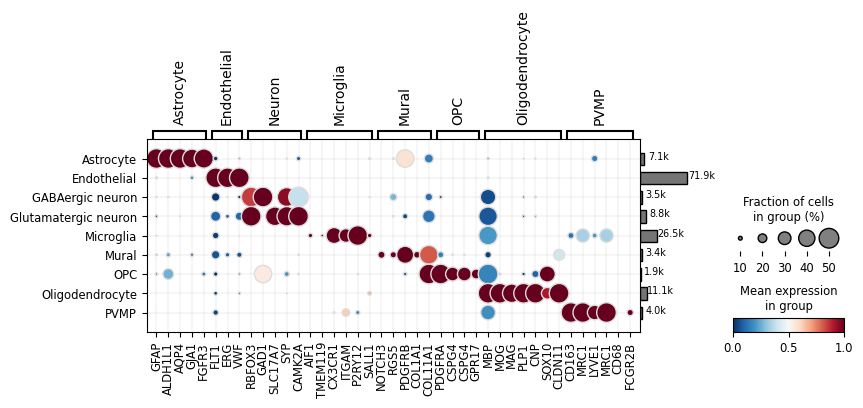

In [ ]:
g = sc.pl.dotplot(adata,groupby="bulk_label",
    standard_scale="var",var_names=markers, cmap='RdBu_r', return_fig=True, dendrogram=False, 
                  figsize=(9,2.5), show=False,smallest_dot=0.4
                   #             order=['GABAergic neuron', 'Endothelial', 'Glutamatergic neuron',
       #'Microglia', 'Mural', 'OPC', 'Oligodendrocyte', 'PVMP', 'Tcell']   #size_title=1
                 );
g.add_totals(color='#757575').style(dot_edge_lw=50)
g.style(cmap='RdBu_r', dot_edge_color='#DDDDDD', dot_edge_lw=1, dot_min=0.05, dot_max=0.5, grid=True)

g.savefig('./figures/figure1-prettydotplot_fixed_knowmarkers_removeTcell.pdf');
g.show()